In [1]:
#Instalace závislostí
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import závislostí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Načtení dat
reqs_df = pd.read_csv("steam_requirements_data.csv")

# Základní info
reqs_df.info()
reqs_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27319 entries, 0 to 27318
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   steam_appid         27319 non-null  int64 
 1   pc_requirements     27319 non-null  object
 2   mac_requirements    27319 non-null  object
 3   linux_requirements  27319 non-null  object
 4   minimum             27314 non-null  object
 5   recommended         14134 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


steam_appid               0
pc_requirements           0
mac_requirements          0
linux_requirements        0
minimum                   5
recommended           13185
dtype: int64

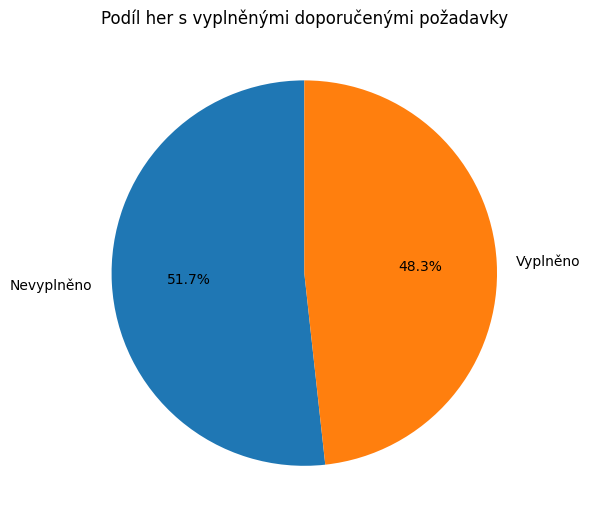

In [4]:
# Vyplněné doporučené požadavky
reqs_df['has_min'] = reqs_df['minimum'].notnull()
reqs_df['has_rec'] = reqs_df['recommended'].notnull()

rec_counts = reqs_df['has_rec'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(rec_counts, labels=['Nevyplněno', 'Vyplněno'], autopct='%1.1f%%', startangle=90)
plt.title("Podíl her s vyplněnými doporučenými požadavky")
plt.tight_layout()
plt.show()

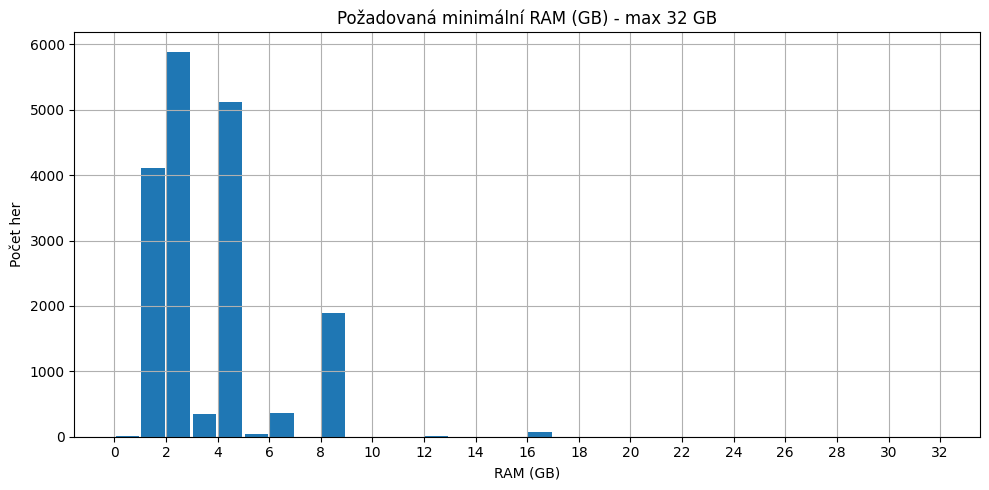

In [5]:
# Histogram her podle minimálních požadavků RAM

# Extrakce RAM z minimálních požadavků
def extract_ram(text):
    if pd.isnull(text): return None
    match = re.search(r'(\d+)\s?GB\s?RAM', text, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None

reqs_df['min_ram_gb'] = reqs_df['minimum'].apply(extract_ram)

plt.figure(figsize=(10, 5))
filtered_ram = reqs_df[reqs_df['min_ram_gb'] < 32]['min_ram_gb'].dropna().astype(int)
filtered_ram.plot.hist(bins=range(0, 33, 1), rwidth=0.9)
plt.title("Požadovaná minimální RAM (GB) - max 32 GB")
plt.xlabel("RAM (GB)")
plt.ylabel("Počet her")
plt.xticks(range(0, 33, 2))
plt.grid(True)
plt.tight_layout()
plt.show()

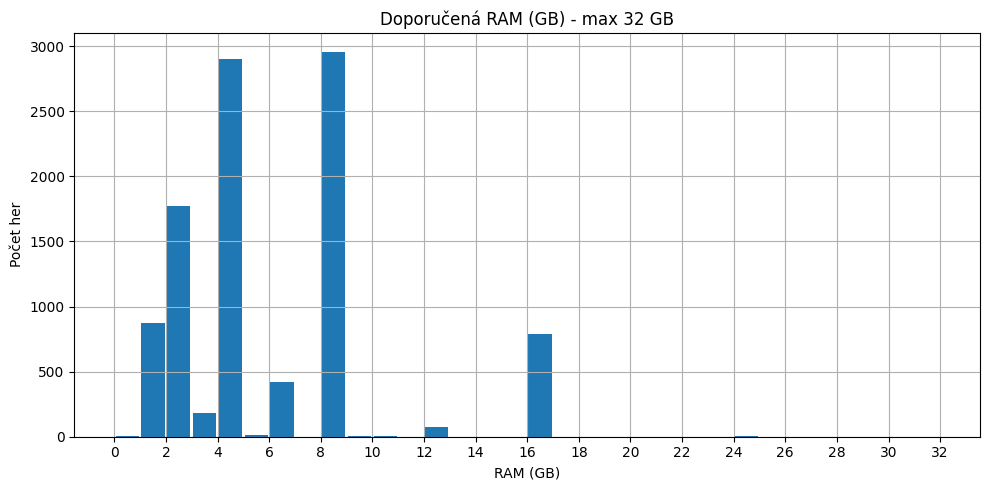

In [6]:
# Histogram her podle doporučených požadavků RAM
reqs_df['min_ram_gb'] = reqs_df['recommended'].apply(extract_ram)

plt.figure(figsize=(10, 5))
filtered_ram = reqs_df[reqs_df['min_ram_gb'] < 32]['min_ram_gb'].dropna().astype(int)
filtered_ram.plot.hist(bins=range(0, 33, 1), rwidth=0.9)
plt.title("Doporučená RAM (GB) - max 32 GB")
plt.xlabel("RAM (GB)")
plt.ylabel("Počet her")
plt.xticks(range(0, 33, 2))
plt.grid(True)
plt.tight_layout()
plt.show()

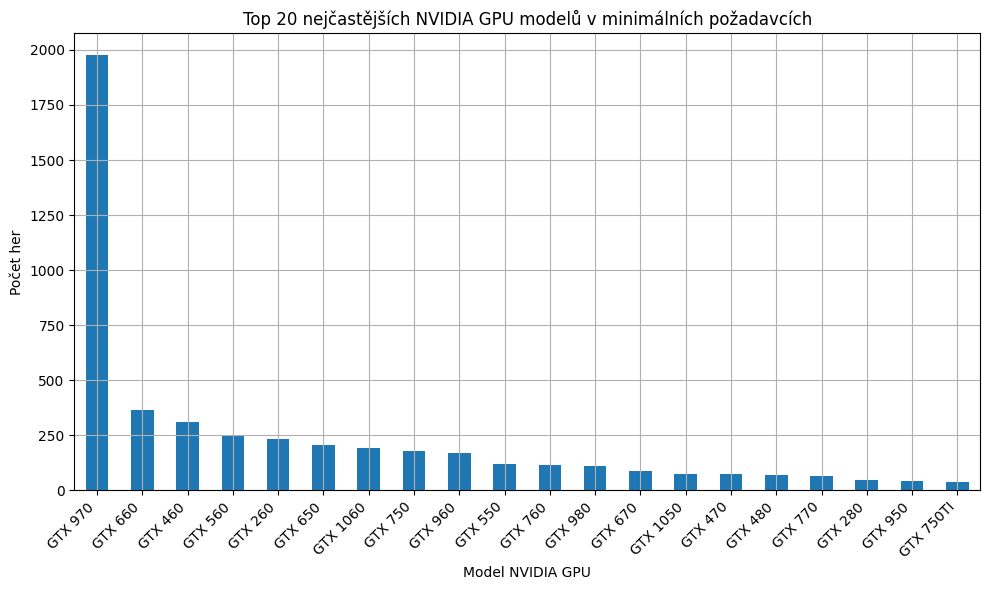

In [7]:
# Top NVIDIA GPU v minimálních požadavcích
def extract_nvidia_model(text):
    if pd.isnull(text): return None
    text = text.lower()
    match = re.search(r'(gtx|rtx)\s?(\d{3,4}(?:ti)?)', text)
    if match:
        return match.group(1).upper() + ' ' + match.group(2).upper()
    return None

reqs_df['nvidia_gpu_model'] = reqs_df['minimum'].apply(extract_nvidia_model)
model_counts = reqs_df['nvidia_gpu_model'].value_counts().head(20)

plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar')
plt.title("Top 20 nejčastějších NVIDIA GPU modelů v minimálních požadavcích")
plt.xlabel("Model NVIDIA GPU")
plt.ylabel("Počet her")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

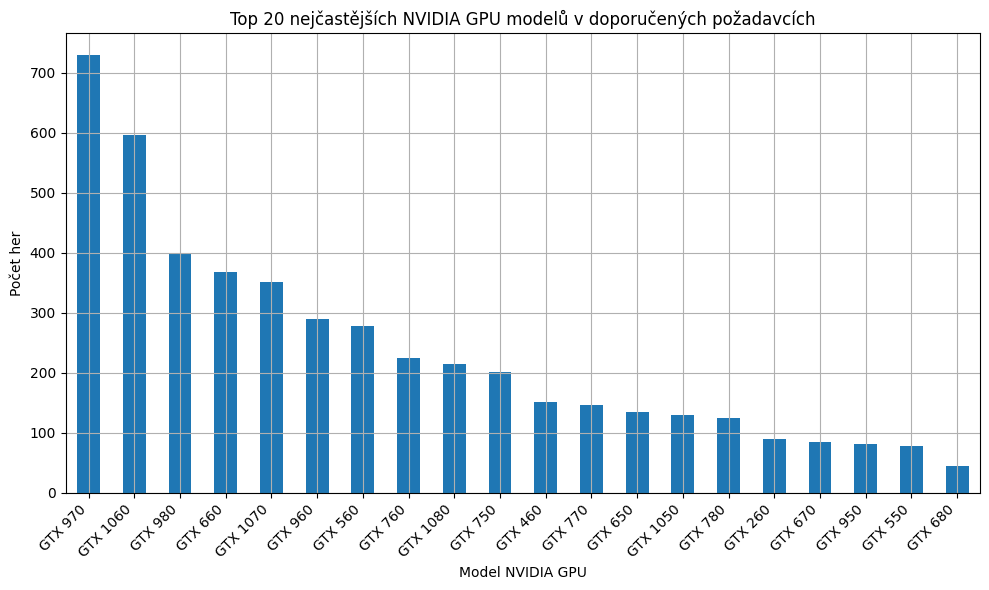

In [8]:
# Top NVIDIA GPU v doporučených požadavcích
reqs_df['nvidia_gpu_model'] = reqs_df['recommended'].apply(extract_nvidia_model)
model_counts = reqs_df['nvidia_gpu_model'].value_counts().head(20)

plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar')
plt.title("Top 20 nejčastějších NVIDIA GPU modelů v doporučených požadavcích")
plt.xlabel("Model NVIDIA GPU")
plt.ylabel("Počet her")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

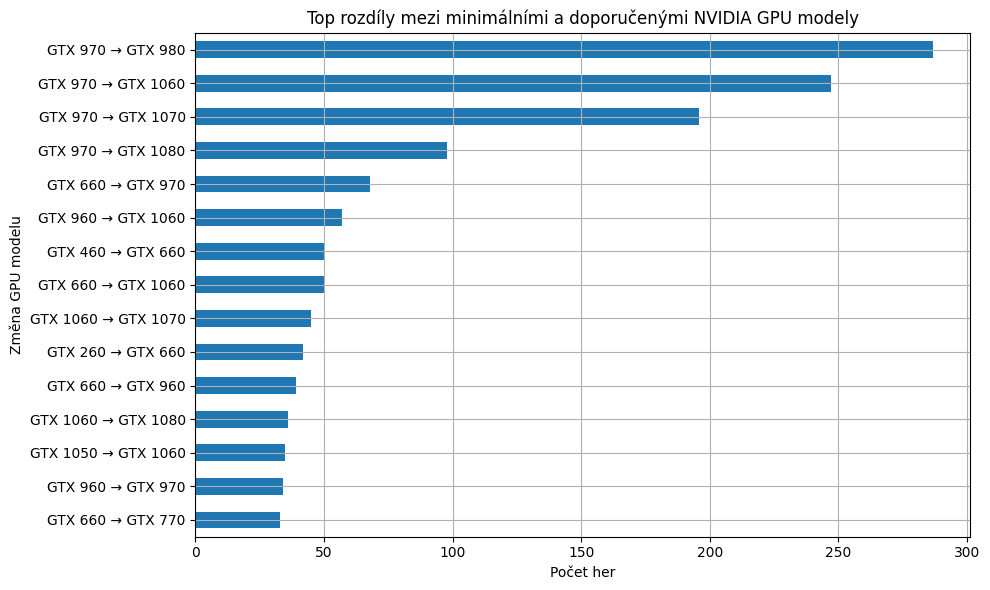

In [9]:
# Rozdíl mezi minimální a doporučenou GPU

reqs_df['nvidia_gpu_model_min'] = reqs_df['minimum'].apply(extract_nvidia_model)
reqs_df['nvidia_gpu_model_rec'] = reqs_df['recommended'].apply(extract_nvidia_model)

gpu_diff_df = reqs_df[
    reqs_df['nvidia_gpu_model_min'].notnull() &
    reqs_df['nvidia_gpu_model_rec'].notnull() &
    (reqs_df['nvidia_gpu_model_min'] != reqs_df['nvidia_gpu_model_rec'])
].copy()

gpu_diff_df['gpu_model_diff'] = gpu_diff_df['nvidia_gpu_model_min'] + " → " + gpu_diff_df['nvidia_gpu_model_rec']
top_diffs = gpu_diff_df['gpu_model_diff'].value_counts().head(15)

plt.figure(figsize=(10, 6))
top_diffs.plot(kind='barh')
plt.title("Top rozdíly mezi minimálními a doporučenými NVIDIA GPU modely")
plt.xlabel("Počet her")
plt.ylabel("Změna GPU modelu")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(True)
plt.show()
